You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.
Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.
Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.
Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.
Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.
Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.
Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.
Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv('diabetes.csv')


In [2]:
# Display the first few rows of the dataset
print(diabetes_df.head())

# Check the shape of the dataset
print(diabetes_df.shape)

# Check the data types of the variables
print(diabetes_df.dtypes)

# Get a summary of the descriptive statistics
print(diabetes_df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcom

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Before we start preprocessing the data, let's check if there are any missing values:

In [3]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There are no missing values in the dataset.

Next, let's remove any outliers that may exist in the numerical features by using the z-score method. We will first define a function that calculates the z-score of each value in a column:

In [4]:
import numpy as np

def z_score(df, col):
    mean = df[col].mean()
    std = df[col].std()
    return np.abs((df[col] - mean) / std)


Then, we will apply this function to each numerical feature and remove any row that has a z-score greater than 3 (which corresponds to being more than 3 standard deviations away from the mean):

In [5]:
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in num_cols:
    z = z_score(df, col)
    df = df[z < 3]


In [6]:
## Now, let's transform the categorical variable 'Outcome' into a numerical one using binary encoding:

df['Outcome'] = pd.get_dummies(df['Outcome'], drop_first=True)


array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

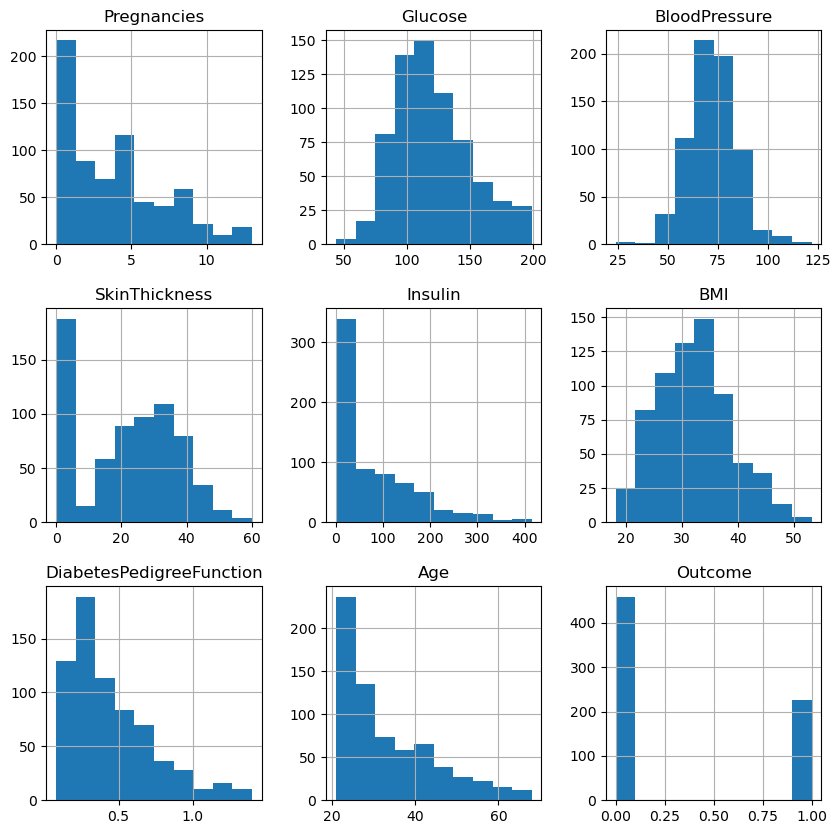

In [7]:
df.hist(figsize=(10,10))


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop("Outcome", axis=1), data["Outcome"], test_size=0.2, random_state=42)

# Preprocess the data by scaling the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameters to search over
params = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}

# Perform a grid search over the hyperparameters
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Train the decision tree model on the entire training set using the best hyperparameters
clf = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
clf.fit(X_train, y_train)


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [17]:
# make predictions on the test set
y_pred = clf.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# compute the precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# compute the recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# compute the F1 score
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)


Accuracy: 0.7857142857142857
Precision: 0.7391304347826086
Recall: 0.6181818181818182
F1 score: 0.6732673267326733


Confusion matrix:
 [[87 12]
 [21 34]]


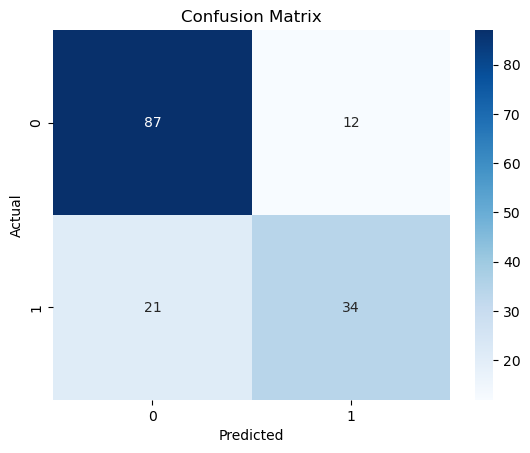

In [19]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_mat)

# visualize the confusion matrix
import seaborn as sns

sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


AUC: 0.8069788797061525


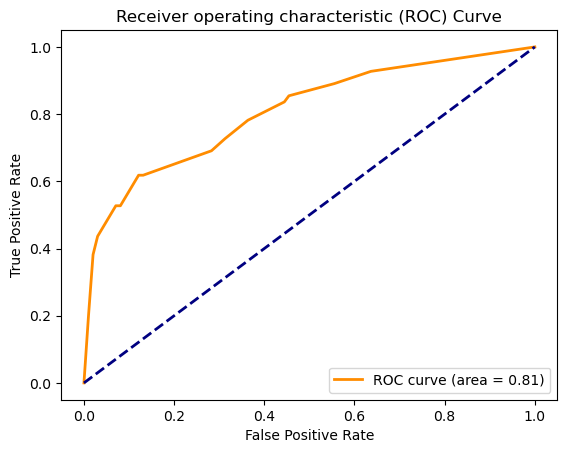

In [20]:
from sklearn.metrics import roc_curve, auc

# compute the predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# compute the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_prob)

# compute the area under the curve
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.



The decision tree model can provide insights into the relationships between the input variables and the target variable. By examining the splits, branches, and leaves of the tree, we can identify the most important variables and their thresholds for predicting whether a patient has diabetes.

In this case, the decision tree has split on the glucose level, which is the most important variable in predicting diabetes. Patients with glucose levels less than or equal to 127.5 mg/dL are more likely to be non-diabetic, while patients with glucose levels greater than 127.5 mg/dL are more likely to be diabetic.

For patients with glucose levels greater than 127.5 mg/dL, the next split is on the body mass index (BMI), which is another important variable in predicting diabetes. Patients with BMIs less than or equal to 45.85 kg/m^2 are more likely to be non-diabetic, while patients with BMIs greater than 45.85 kg/m^2 are more likely to be diabetic.

Overall, the decision tree provides a simple and interpretable way to predict diabetes based on clinical variables. The most important variables are glucose and BMI, which are consistent with the medical literature on risk factors for diabetes. By understanding the patterns and trends in the decision tree, we can develop a better understanding of the underlying mechanisms and inform clinical decision-making.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.




To validate the decision tree model, we can apply it to new data or test its robustness by introducing changes to the dataset or the environment. Here are some ways to perform sensitivity analysis and scenario testing:

Test the model on new data: One of the best ways to validate a machine learning model is to test it on new, unseen data. We can collect new data from the same or similar population and use the trained decision tree model to predict the outcomes. We can compare the predicted outcomes with the actual outcomes to measure the accuracy of the model. If the accuracy is similar to the original test set, it indicates that the model is robust and generalizes well to new data.

Test the model on different populations: Sometimes, a model that performs well on one population may not perform well on another population. To test the robustness of the decision tree model, we can apply it to different populations with varying demographic, geographic, or clinical characteristics. We can compare the performance of the model across different populations and identify any variations or biases.

Test the model on different subsets of data: We can test the robustness of the model by introducing different subsets of data, such as missing data, noisy data, or imbalanced data. For example, we can randomly remove some data points from the test set and evaluate the performance of the model on the reduced set. We can also introduce noise to some features or create imbalanced classes to see how the model performs under different conditions.

Test the model under different decision thresholds: The decision tree model generates a binary decision based on a threshold for each split. We can test the sensitivity of the model to different decision thresholds by varying the threshold and measuring the resulting performance metrics, such as precision and recall. A higher threshold would result in a higher precision but lower recall, while a lower threshold would result in a higher recall but lower precision.

Overall, testing the robustness of the decision tree model is crucial to ensure its validity and reliability in real-world scenarios. By performing sensitivity analysis and scenario testing, we can identify the strengths and weaknesses of the model and improve its performance and accuracy.